# Introduction

In this analysis, I will be studying the World Happiness Report data(1) avaiable on Kaggle.com. In the data collection, participants from different countries were asked to provide their happiness score, also known as the Life Ladder, on a scale of 1-10. They were also asked a series of questions related to social support, confidence in government, freedom to make life choices, etc. 

I hope to examine the correlations between those factors and the impact they have on the overall Happiness Score. I will also be providing some summary statistics throughout this analysis to help you development a better understanding of the dataset.

# Import Data & Cleaning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ezhang11/Capstone---World-Happiness-Report/main/World%20Happiness%20Report.csv')


Select a subset of columns from the original dataset and rename:

In [4]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [5]:
df0 = df.loc[:,['Country Name','Regional Indicator','Year', 
        'Life Ladder','Log GDP Per Capita', 'Social Support',
        'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
        'Generosity', 'Perceptions Of Corruption']]

Limit year range from 2012 to 2022. This allows us to study the World Happiness Report from the past 10 years.

In [6]:
df1 = df[df0['Year'] >= 2012]
df1

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703


Remove missing values from dataset:

In [7]:
df2 = df1.dropna()
df2

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,Zimbabwe,Sub-Saharan Africa,2017,3.638300,7.754387,0.754147,52.150002,0.752826,-0.080725,0.751208,0.733641,0.224051,0.682647
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302


# Summary Statistics

Create a summary of happiness score by country:

In [15]:
Score_by_country = df2.groupby(['Country Name'])['Life Ladder'].mean().reset_index(name = 'Happiness Score').sort_values(by='Happiness Score',ascending=False)
Score_by_country

,Country Name,Happiness Score
35,Finland,7.646762
28,Denmark,7.583715
114,Switzerland,7.534686
48,Iceland,7.530927
92,Norway,7.493252
...,...,...
66,Lesotho,3.705095
128,Yemen,3.657285
116,Tanzania,3.580445
102,Rwanda,3.317641


Finlan, Denmark and Switzerland are ranked in the top 3 in Happiness Score. Tanzania, Rwanda and Afghanistan have the lowest Happiness Score.

Summary of Happiness Score by Region:

In [9]:
Score_by_region = df2.groupby(['Regional Indicator'])['Life Ladder'].mean().reset_index(name = 'Happiness Score').sort_values(by='Happiness Score',ascending=False)
Score_by_region

,Regional Indicator,Happiness Score
5,North America and ANZ,7.190868
9,Western Europe,6.845002
3,Latin America and Caribbean,5.998627
2,East Asia,5.690271
0,Central and Eastern Europe,5.648091
7,Southeast Asia,5.431567
1,Commonwealth of Independent States,5.309190
4,Middle East and North Africa,4.958611
6,South Asia,4.411099
8,Sub-Saharan Africa,4.350081


Average Happiness is ranked the highest in North America and Australia and New Zealand (ANZ), while countries in Africa and asian are among the least happy regions.

# Visualization

Create a correlation matrix to examine relationships between explanatory variables with each other as well as their relationships with the response variable, Life Ladder.

In [10]:
df2.corr()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Year,1.000000,0.082730,0.057556,0.030664,0.120086,0.212991,0.006461,-0.084273,0.017359,0.136548,0.083028
Life Ladder,0.082730,1.000000,0.794113,0.745177,0.762521,0.545674,0.152222,-0.487015,0.507806,-0.401595,-0.085572
Log GDP Per Capita,0.057556,0.794113,1.000000,0.720610,0.855540,0.372488,-0.026884,-0.391440,0.248174,-0.399198,-0.199929
Social Support,0.030664,0.745177,0.720610,1.000000,0.653340,0.423360,0.064144,-0.264591,0.446304,-0.534550,-0.169053
Healthy Life Expectancy At Birth,0.120086,0.762521,0.855540,0.653340,1.000000,0.372452,0.015052,-0.338642,0.247497,-0.283031,-0.223650
Freedom To Make Life Choices,0.212991,0.545674,0.372488,0.423360,0.372452,1.000000,0.299664,-0.503149,0.604578,-0.308439,0.435563
Generosity,0.006461,0.152222,-0.026884,0.064144,0.015052,0.299664,1.000000,-0.278573,0.278980,-0.078905,0.336897
Perceptions Of Corruption,-0.084273,-0.487015,-0.391440,-0.264591,-0.338642,-0.503149,-0.278573,1.000000,-0.333107,0.338278,-0.466223
Positive Affect,0.017359,0.507806,0.248174,0.446304,0.247497,0.604578,0.278980,-0.333107,1.000000,-0.319178,0.162286
Negative Affect,0.136548,-0.401595,-0.399198,-0.534550,-0.283031,-0.308439,-0.078905,0.338278,-0.319178,1.000000,-0.105194


Create Heatmap to visualize the correlation matrix:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Year'),
  Text(1.5, 0, 'Life Ladder'),
  Text(2.5, 0, 'Log GDP Per Capita'),
  Text(3.5, 0, 'Social Support'),
  Text(4.5, 0, 'Healthy Life Expectancy At Birth'),
  Text(5.5, 0, 'Freedom To Make Life Choices'),
  Text(6.5, 0, 'Generosity'),
  Text(7.5, 0, 'Perceptions Of Corruption'),
  Text(8.5, 0, 'Positive Affect'),
  Text(9.5, 0, 'Negative Affect'),
  Text(10.5, 0, 'Confidence In National Government')])

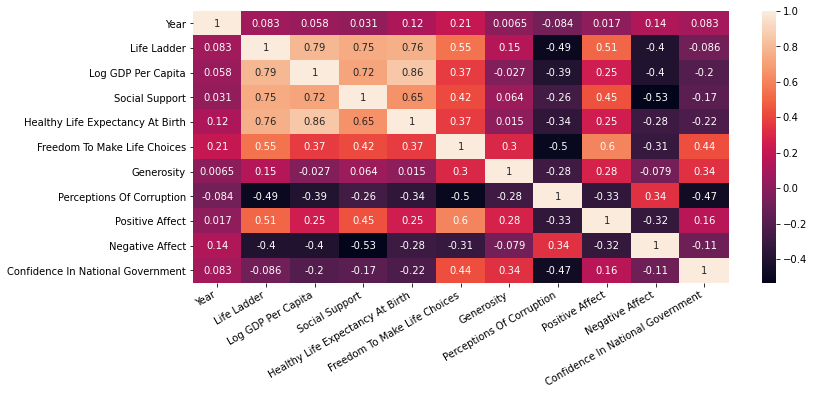

In [11]:
plt.figure(figsize=(12,5))

sns.heatmap(df2.corr(), annot=True)
plt.xticks(rotation = 30, ha='right')

# Additional Analysis

Lastly, I summarized the Average Happiness Score by year and graphed it on a line graph to capture any movement overtime./

In [12]:
df4 = df2.groupby(['Year'])['Life Ladder'].mean().reset_index(name = 'Avg Happiness Score')
df4

,Year,Avg Happiness Score
0,2012,5.464413
1,2013,5.397993
2,2014,5.417868
3,2015,5.411987
4,2016,5.411299
5,2017,5.503383
6,2018,5.541106
7,2019,5.586812
8,2020,5.781765
9,2021,5.653353


Text(0.5, 1.0, 'Average Happiness vs. Time')

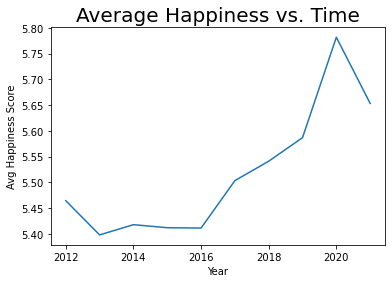

In [13]:
sns.lineplot(data=df4, x="Year", y="Avg Happiness Score").set_title('Average Happiness vs. Time',fontsize = 20)

It appears that during the years 2016 to early 2020, the global average happiness score was increasing, and then it decreased around the time of the Covid-19 pandemic.

# References

1. Base Data & Data Cards
<br> https://www.kaggle.com/datasets/usamabuttar/world-happiness-report-2005-present

2. Seaborn Heatmap Documentation
<br>https://seaborn.pydata.org/generated/seaborn.heatmap.html